# Skin Disorder

###  Importing some Libraryes

In [1]:
#importing libraryes
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score,roc_curve,auc

In [2]:
#lodeing datasetin to variable
df=pd.read_csv("dataset_35_dermatology (1).csv")

In [3]:
df

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0           2        2                 0        3                   0   
1           3        3                 3        2                   1   
2           2        1                 2        3                   1   
3           2        2                 2        0                   0   
4           2        3                 2        2                   2   
..        ...      ...               ...      ...                 ...   
361         2        1                 1        0                   1   
362         3        2                 1        0                   1   
363         3        2                 2        2                   3   
364         2        1                 3        1                   2   
365         3        2                 2        0                   0   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                    0                   0                         0   
1                    0                   0                         0   
2                    3                   0                         3   
3                    0                   0                         0   
4                    2                   0                         2   
..                 ...                 ...                       ...   
361                  0                   0                         0   
362                  0                   0                         0   
363                  2                   0                         2   
364                  3                   0                         2   
365                  0                   0                         0   

     knee_and_elbow_involvement  scalp_involvement  ...  \
0                             1                  0  ...   
1                             1                  1  ...   
2                             0                  0  ...   
3                             3                  2  ...   
4                             0                  0  ...   
..                          ...                ...  ...   
361                           0                  0  ...   
362                           0                  0  ...   
363                           0                  0  ...   
364                           0                  0  ...   
365                           3                  3  ...   

     disappearance_of_the_granular_layer  \
0                                      0   
1                                      0   
2                                      0   
3                                      3   
4                                      2   
..                                   ...   
361                                    0   
362                                    1   
363                                    0   
364                                    0   
365                                    2   

     vacuolisation_and_damage_of_basal_layer  spongiosis  \
0                                          0           3   
1                                          0           0   
2                                          2           3   
3                                          0           0   
4                                          3           2   
..                                       ...         ...   
361                                        0           1   
362                                        0           1   
363                                        3           0   
364                                        2           0   
365                                        0           0   

     saw-tooth_appearance_of_retes  follicular_horn_plug  \
0                                0                     0   
1                                0                     0   
2                                2                     0   
3                                0                     0   
4   

In [4]:
# checking infromation 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

In [5]:
#checkin
df.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [6]:
#checking sone uniq
df['Age'].unique()

array(['55', '8', '26', '40', '45', '41', '18', '57', '22', '30', '20',
       '21', '10', '65', '38', '23', '17', '51', '42', '44', '33', '43',
       '50', '34', '?', '15', '46', '62', '35', '48', '12', '52', '60',
       '32', '19', '29', '25', '36', '13', '27', '31', '28', '64', '39',
       '47', '16', '0', '7', '70', '37', '61', '67', '56', '53', '24',
       '58', '49', '63', '68', '9', '75'], dtype=object)

In [7]:
#droping "?" , "0" in age
df.drop(index=df[df['Age']=='?'].index,inplace=True)
# df.drop(index=df[df['Age']=='0'].index,inplace=True)

In [8]:
df.shape

(358, 35)

In [9]:
df['class'].unique()

array([2, 1, 3, 5, 4, 6], dtype=int64)

In [10]:
df.head()

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0         2        2                 0        3                   0   
1         3        3                 3        2                   1   
2         2        1                 2        3                   1   
3         2        2                 2        0                   0   
4         2        3                 2        2                   2   

   polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                  0                   0                         0   
1                  0                   0                         0   
2                  3                   0                         3   
3                  0                   0                         0   
4                  2                   0                         2   

   knee_and_elbow_involvement  scalp_involvement  ...  \
0                           1                  0  ...   
1                           1                  1  ...   
2                           0                  0  ...   
3                           3                  2  ...   
4                           0                  0  ...   

   disappearance_of_the_granular_layer  \
0                                    0   
1                                    0   
2                                    0   
3                                    3   
4                                    2   

   vacuolisation_and_damage_of_basal_layer  spongiosis  \
0                                        0           3   
1                                        0           0   
2                                        2           3   
3                                        0           0   
4                                        3           2   

   saw-tooth_appearance_of_retes  follicular_horn_plug  \
0                              0                     0   
1                              0                     0   
2                              2                     0   
3                              0                     0   
4                              3                     0   

   perifollicular_parakeratosis  inflammatory_monoluclear_inflitrate  \
0                             0                                    1   
1                             0                                    1   
2                             0                                    2   
3                             0                                    3   
4                             0                                    2   

   band-like_infiltrate  Age  class  
0                     0   55      2  
1                     0    8      1  
2                     3   26      3  
3                     0   40      1  
4                     3   45      3  

[5 rows x 35 columns]

In [11]:
df.describe()

erythema     scaling  definite_borders     itching  \
count  358.000000  358.000000        358.000000  358.000000   
mean     2.078212    1.807263          1.569832    1.354749   
std      0.664865    0.701541          0.900909    1.135062   
min      0.000000    0.000000          0.000000    0.000000   
25%      2.000000    1.000000          1.000000    0.000000   
50%      2.000000    2.000000          2.000000    1.000000   
75%      2.750000    2.000000          2.000000    2.000000   
max      3.000000    3.000000          3.000000    3.000000   

       koebner_phenomenon  polygonal_papules  follicular_papules  \
count          358.000000         358.000000          358.000000   
mean             0.636872           0.449721            0.170391   
std              0.908709           0.956468            0.576394   
min              0.000000           0.000000            0.000000   
25%              0.000000           0.000000            0.000000   
50%              0.000000           0.000000            0.000000   
75%              1.000000           0.000000            0.000000   
max              3.000000           3.000000            3.000000   

       oral_mucosal_involvement  knee_and_elbow_involvement  \
count                358.000000                  358.000000   
mean                   0.379888                    0.622905   
std                    0.837388                    0.990278   
min                    0.000000                    0.000000   
25%                    0.000000                    0.000000   
50%                    0.000000                    0.000000   
75%                    0.000000                    1.000000   
max                    3.000000                    3.000000   

       scalp_involvement  ...  focal_hypergranulosis  \
count         358.000000  ...             358.000000   
mean            0.530726  ...               0.399441   
std             0.912352  ...               0.856479   
min             0.000000  ...               0.000000   
25%             0.000000  ...               0.000000   
50%             0.000000  ...               0.000000   
75%             1.000000  ...               0.000000   
max             3.000000  ...               3.000000   

       disappearance_of_the_granular_layer  \
count                           358.000000   
mean                              0.474860   
std                               0.871705   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               1.000000   
max                               3.000000   

       vacuolisation_and_damage_of_basal_layer  spongiosis  \
count                               358.000000  358.000000   
mean                                  0.460894    0.949721   
std                                   0.959914    1.129060   
min                                   0.000000    0.000000   
25%                                   0.000000    0.000000   
50%                                   0.000000    0.000000   
75%                                   0.000000    2.000000   
max                                   3.000000    3.000000   

       saw-tooth_appearance_of_retes  follicular_horn_plug  \
count                     358.000000            358.000000   
mean                        0.458101              0.106145   
std                         0.959796              0.455180   
min                         0.000000              0.000000   
25%                         0.000000              0.000000   
50%                         0.000000              0.000000   
75%                         0.000000              0.000000   
max                         3.000000              3.000000   

       perifollicular_parakeratosis  inflammatory_monoluclear_inflitrate  \
count                    358.000000                           358.000000   
mean                       0.117318                             1.8770

In [88]:
#checking unique values 
df.nunique()

erythema                                4
scaling                                 4
definite_borders                        4
itching                                 4
koebner_phenomenon                      4
polygonal_papules                       4
follicular_papules                      4
knee_and_elbow_involvement              4
scalp_involvement                       4
family_history                          2
eosinophils_in_the_infiltrate           3
PNL_infiltrate                          4
fibrosis_of_the_papillary_dermis        4
exocytosis                              4
acanthosis                              4
hyperkeratosis                          4
parakeratosis                           4
clubbing_of_the_rete_ridges             4
elongation_of_the_rete_ridges           4
spongiform_pustule                      4
munro_microabcess                       4
disappearance_of_the_granular_layer     4
spongiosis                              4
follicular_horn_plug              

In [89]:
df=df.astype({'Age':'int64'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358 entries, 0 to 365
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   erythema                             358 non-null    int64
 1   scaling                              358 non-null    int64
 2   definite_borders                     358 non-null    int64
 3   itching                              358 non-null    int64
 4   koebner_phenomenon                   358 non-null    int64
 5   polygonal_papules                    358 non-null    int64
 6   follicular_papules                   358 non-null    int64
 7   knee_and_elbow_involvement           358 non-null    int64
 8   scalp_involvement                    358 non-null    int64
 9   family_history                       358 non-null    int64
 10  eosinophils_in_the_infiltrate        358 non-null    int64
 11  PNL_infiltrate                       358 non-null    int64

In [90]:
#there are no duplicte values in dataset
df.duplicated().sum()

0

### EDA

                                             |                                             | [  0%]   00:00 ->…


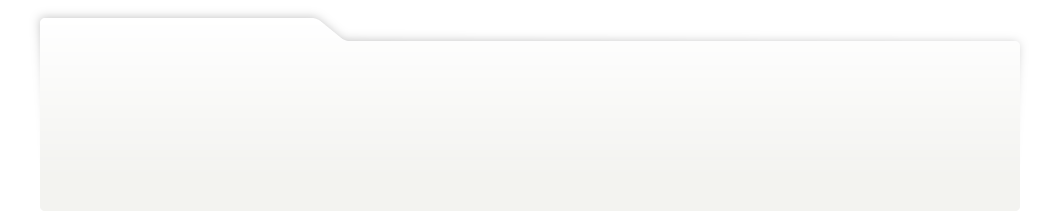
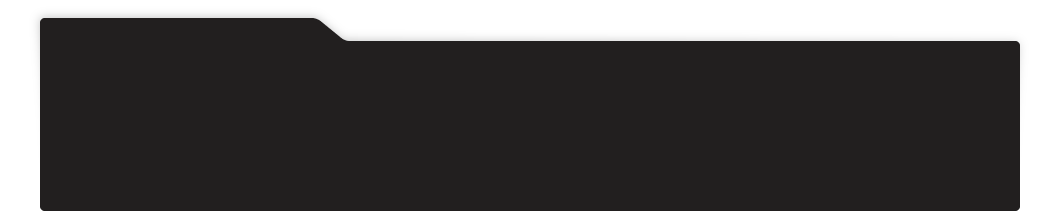
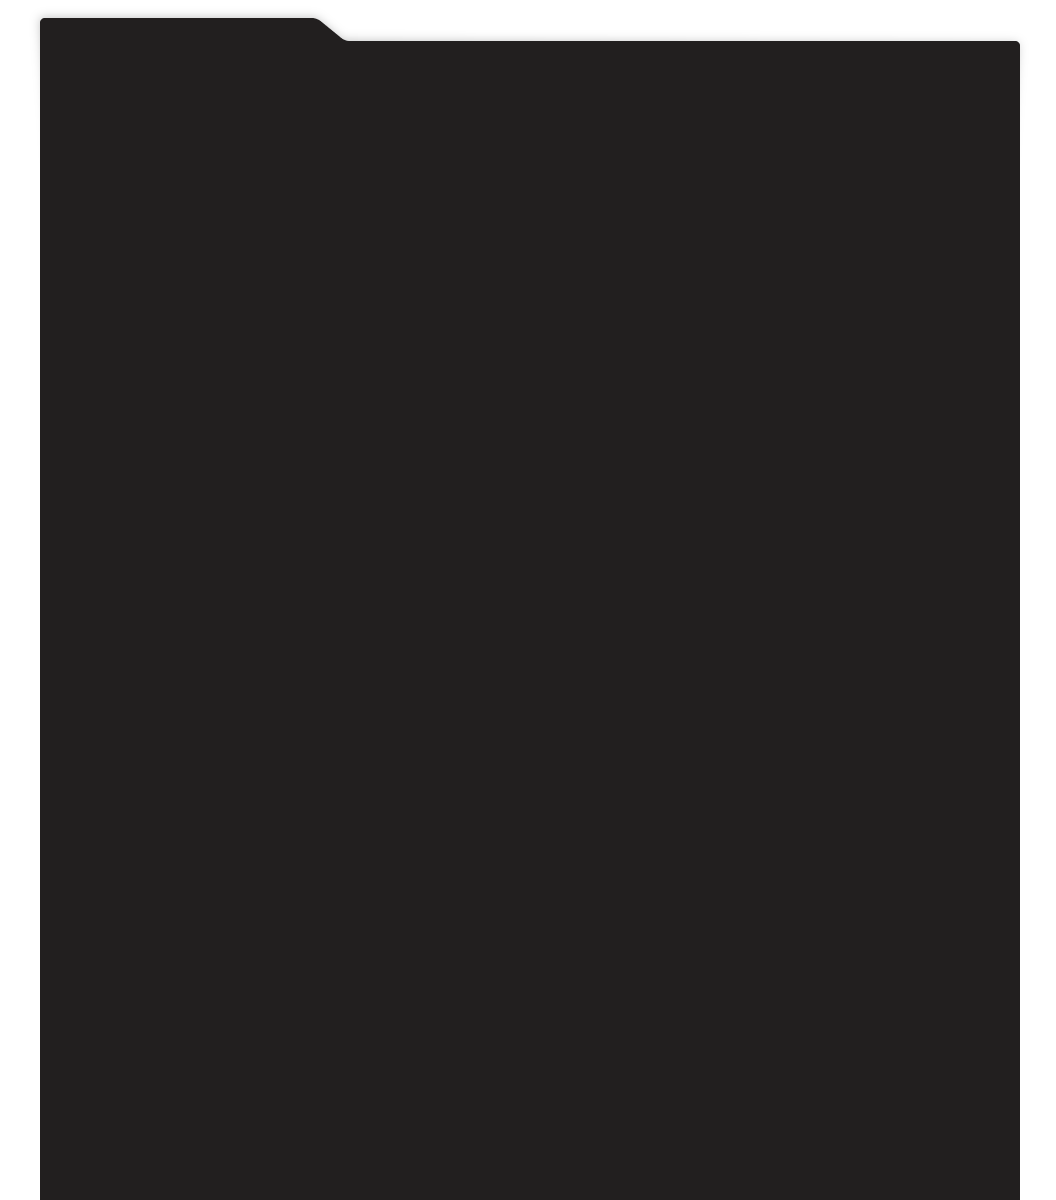
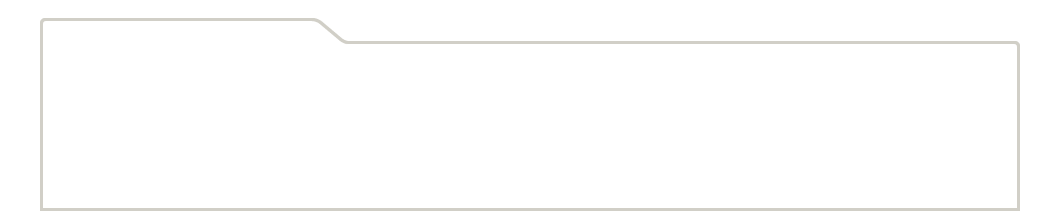
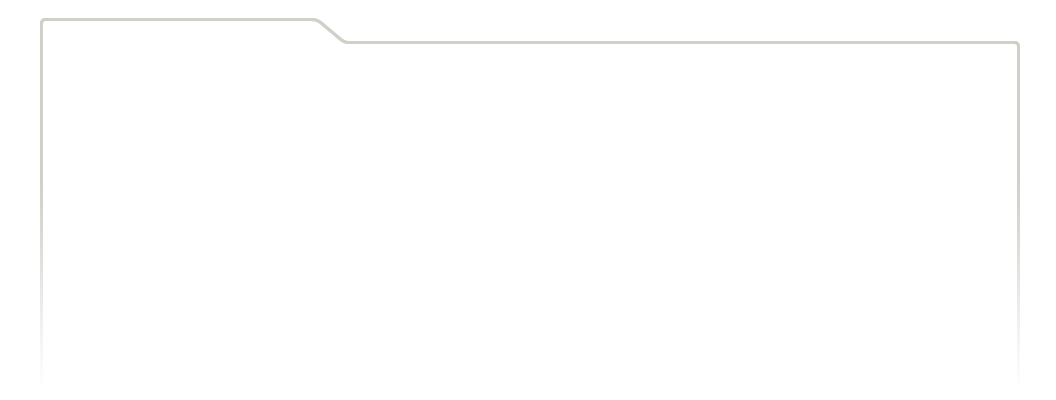
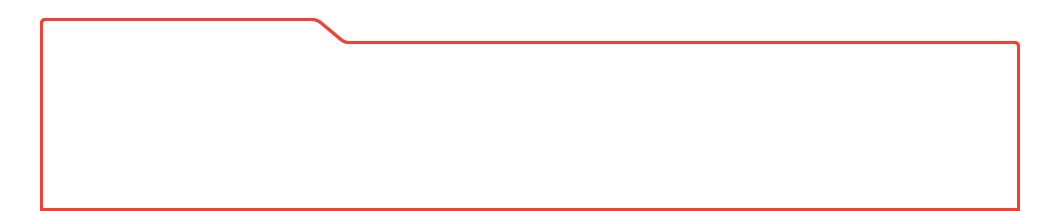
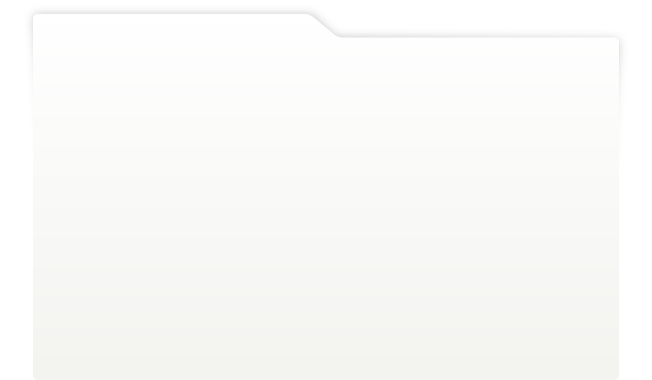
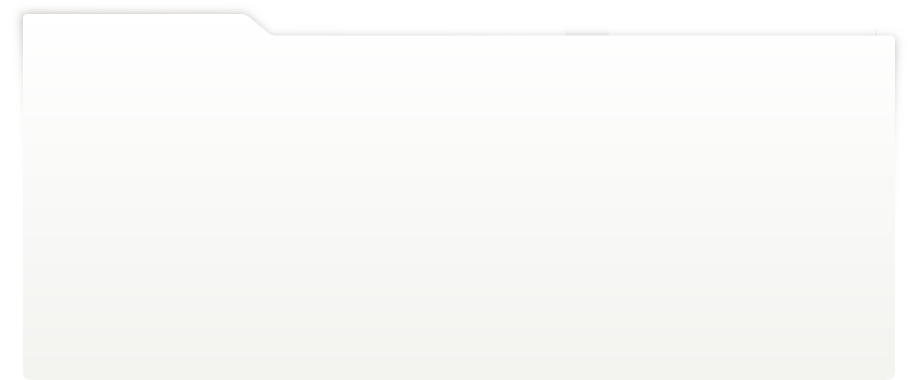
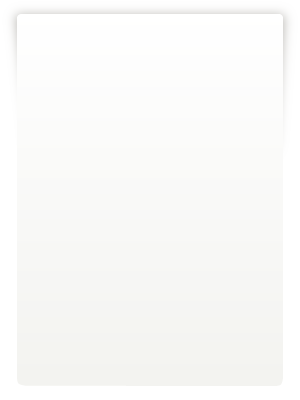
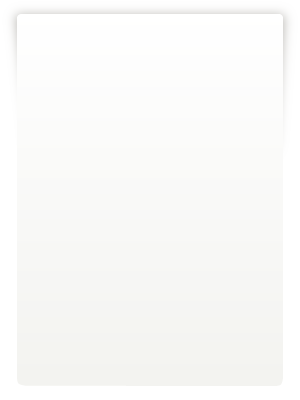
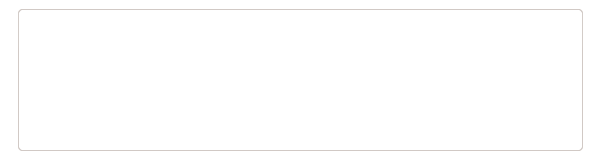
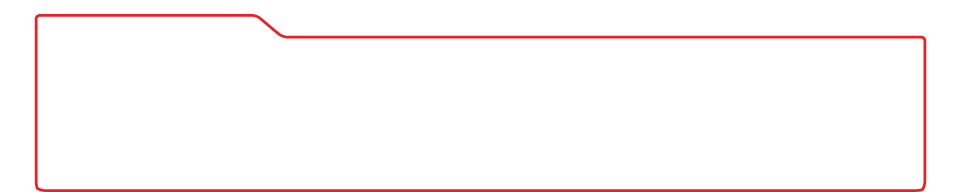
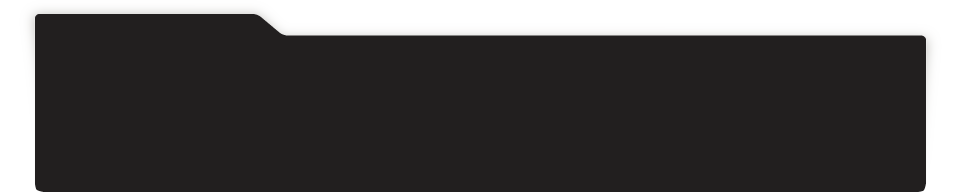
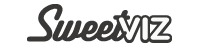
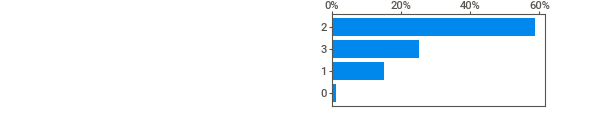
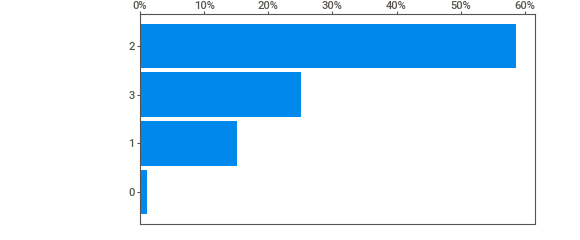
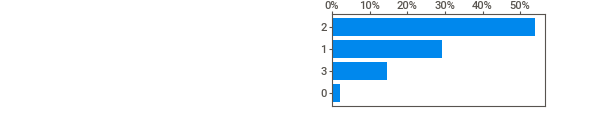
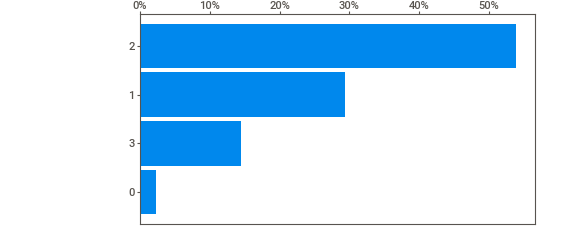
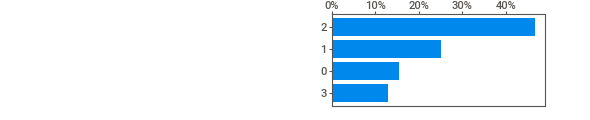
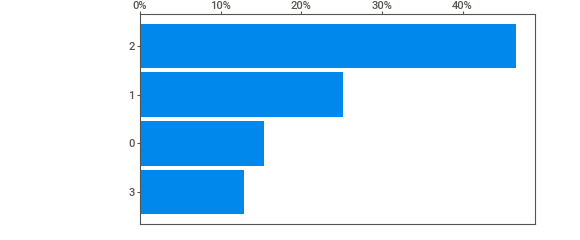
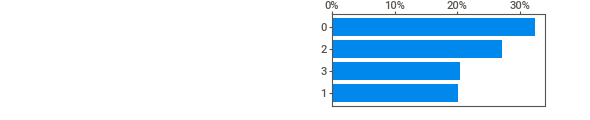
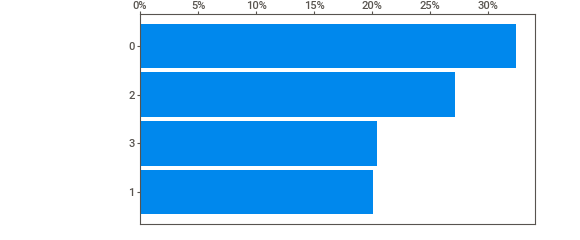
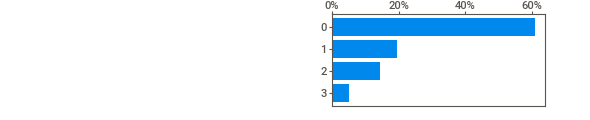
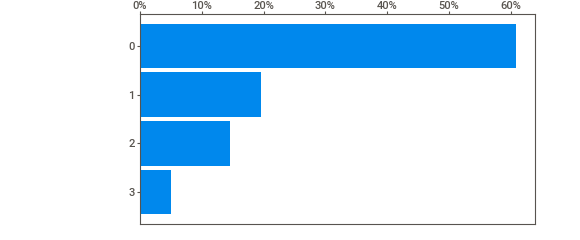
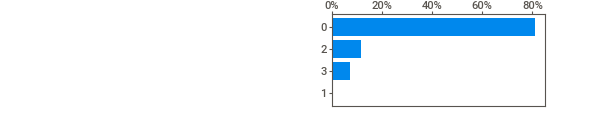
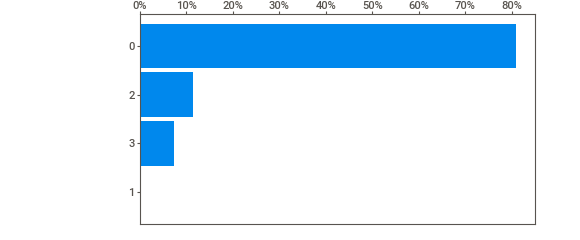
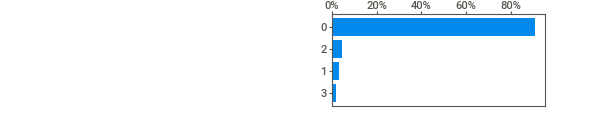
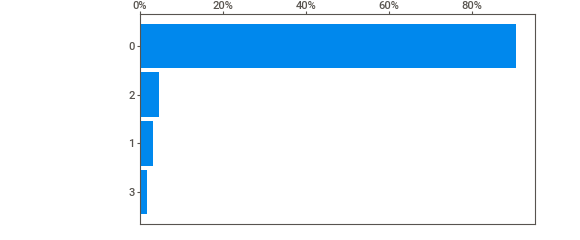
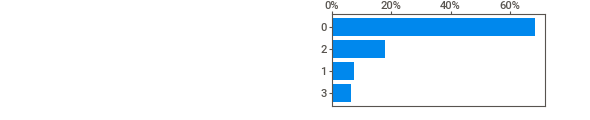
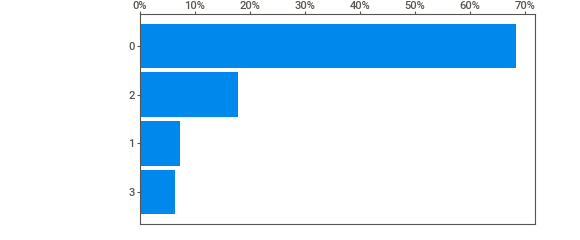
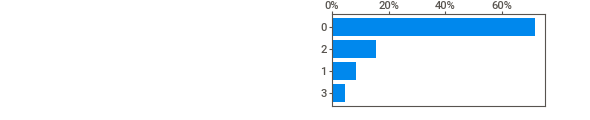
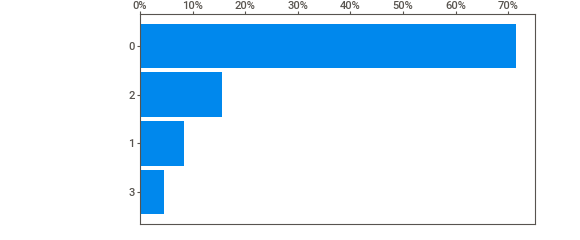
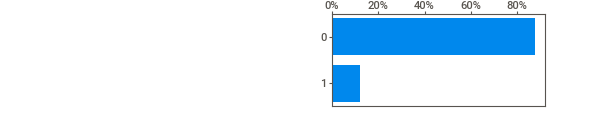
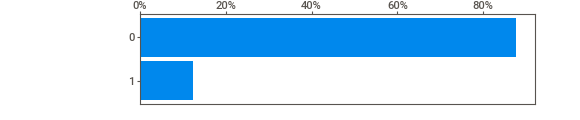
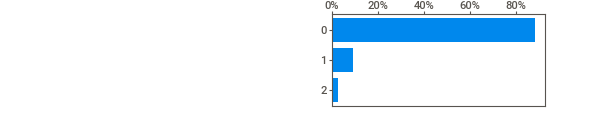
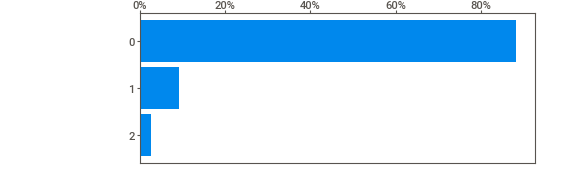
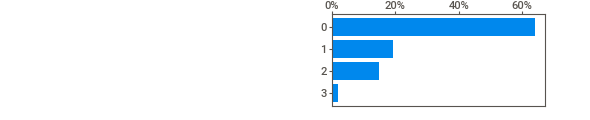
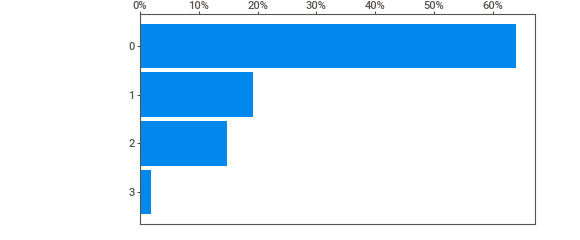
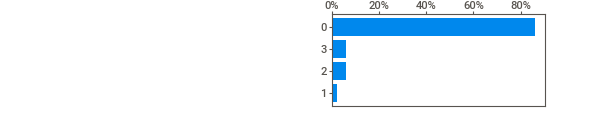
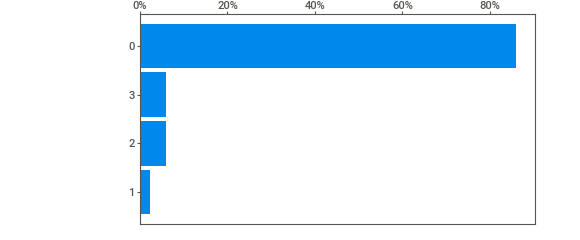
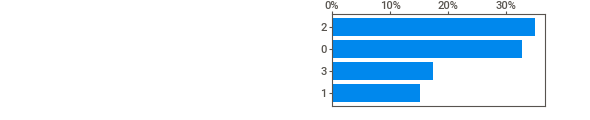
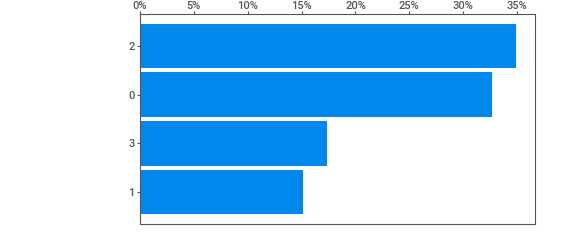
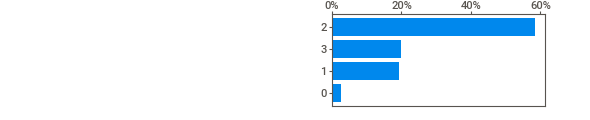
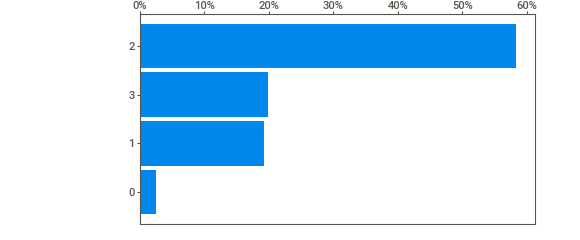
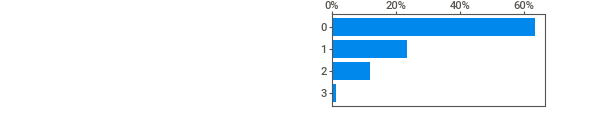
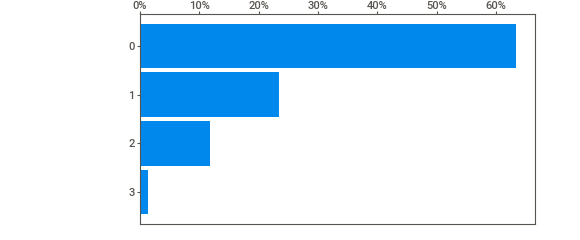
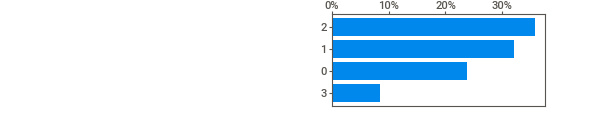
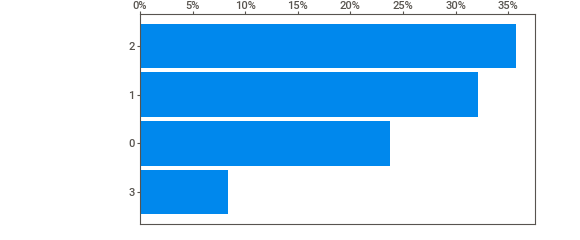
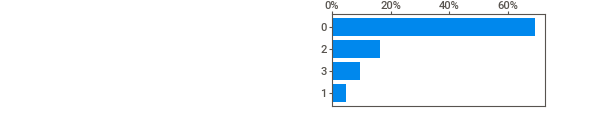
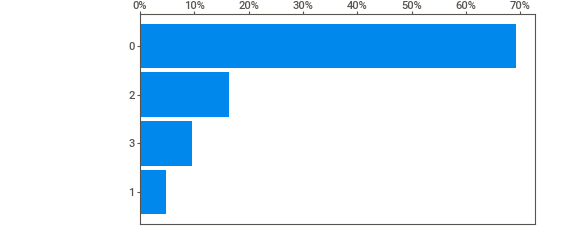
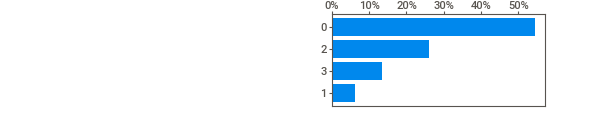
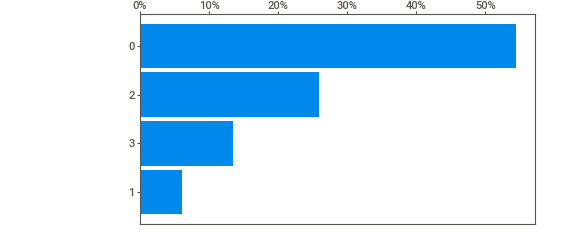
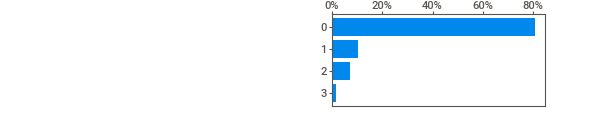
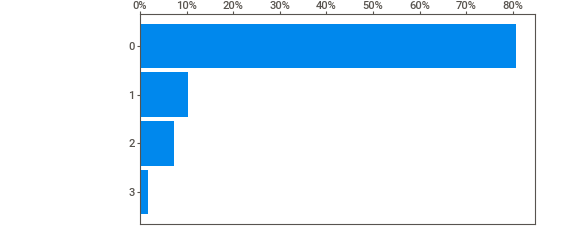
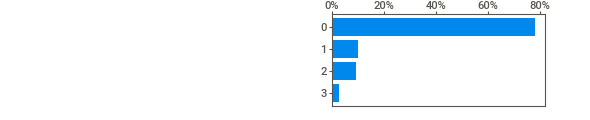
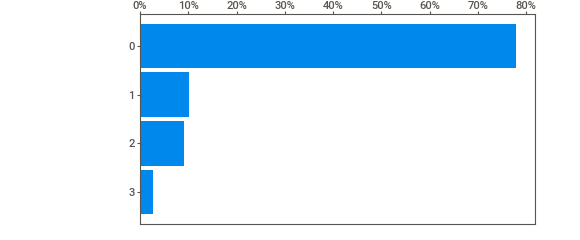
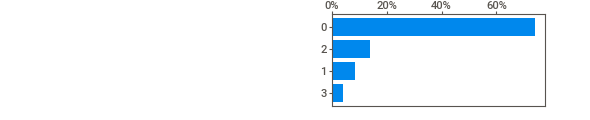
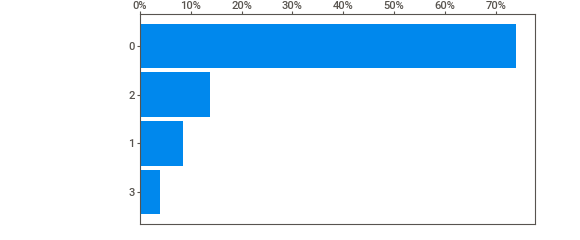
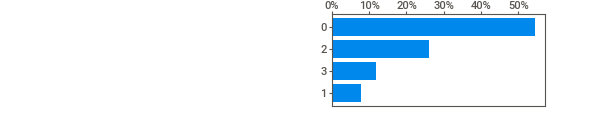
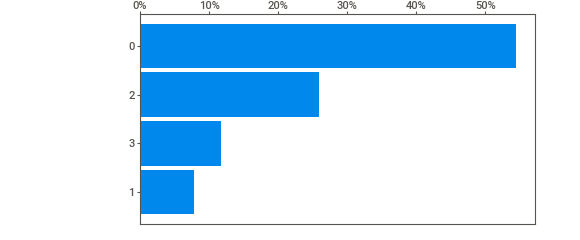
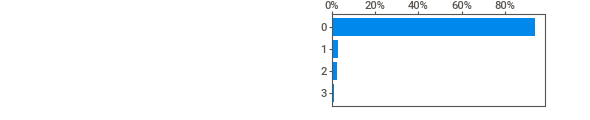
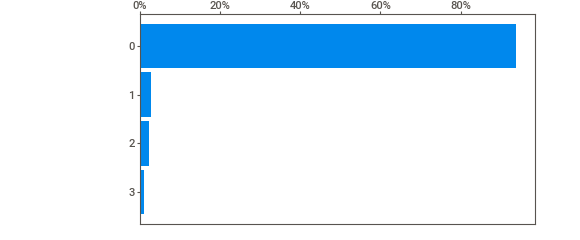
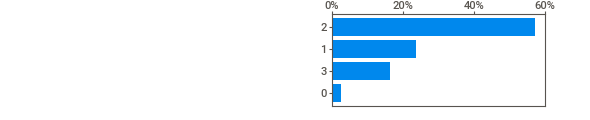
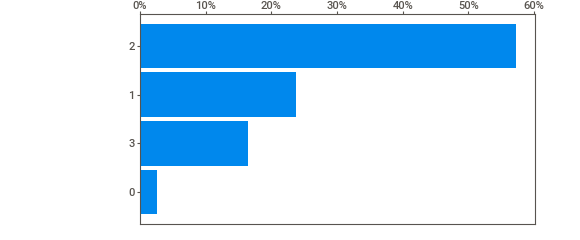
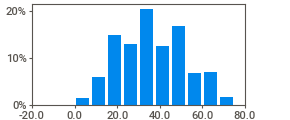
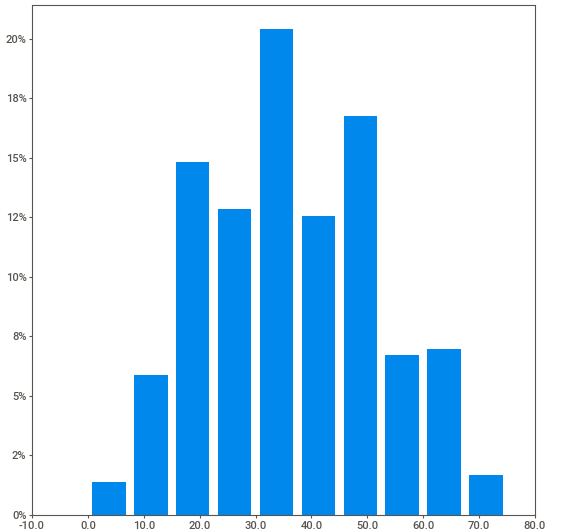
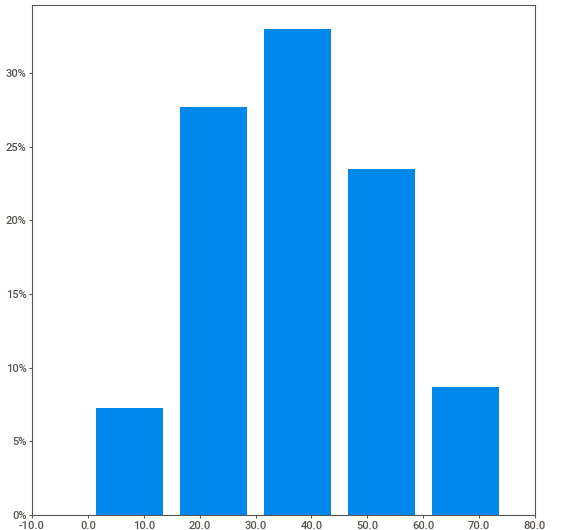
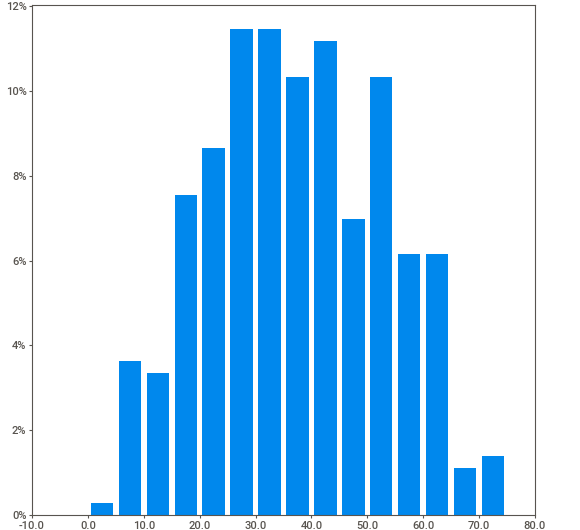
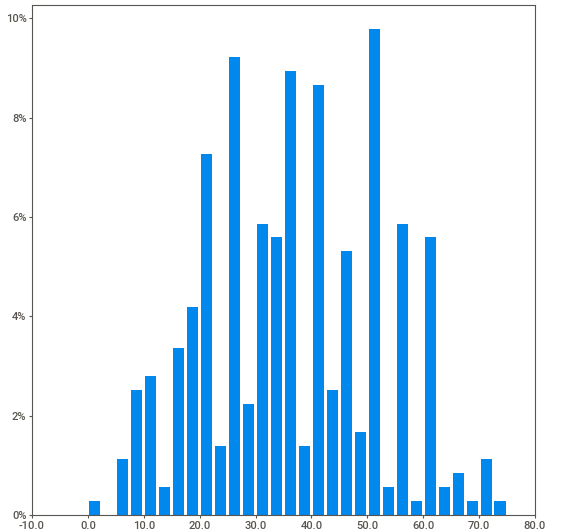
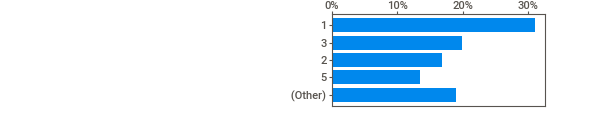
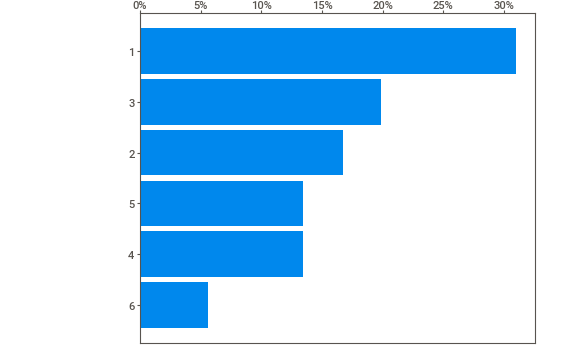
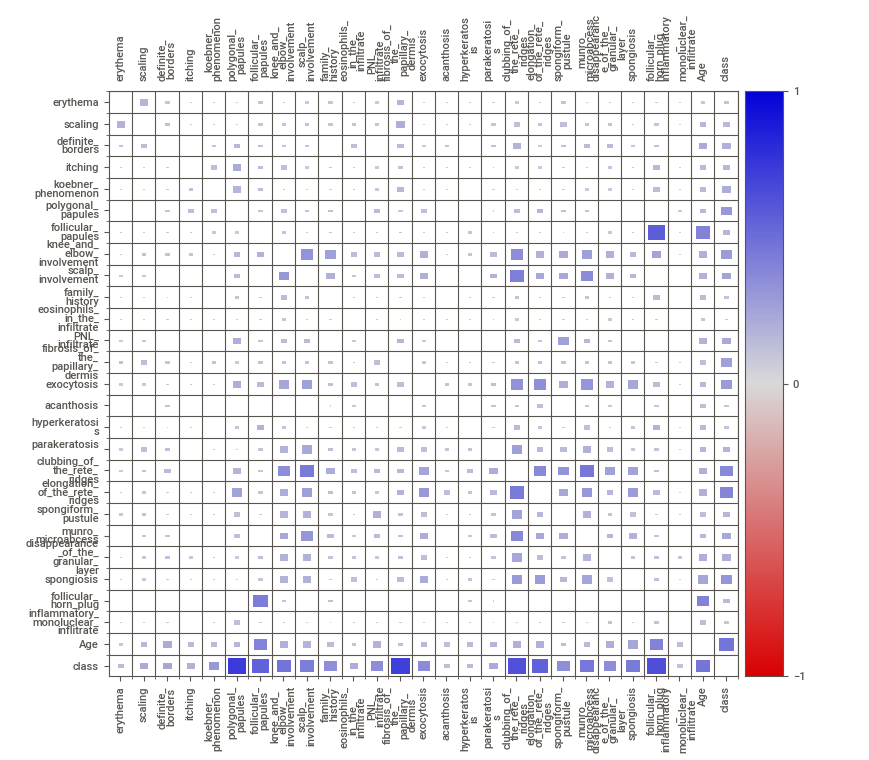
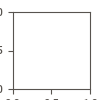

In [91]:
!pip install sweetviz  
#Automated Library for visualization

import sweetviz as sv #  library for univariant analysis
my_report = sv.analyze(df)## pass the original dataframe
my_report.show_notebook()

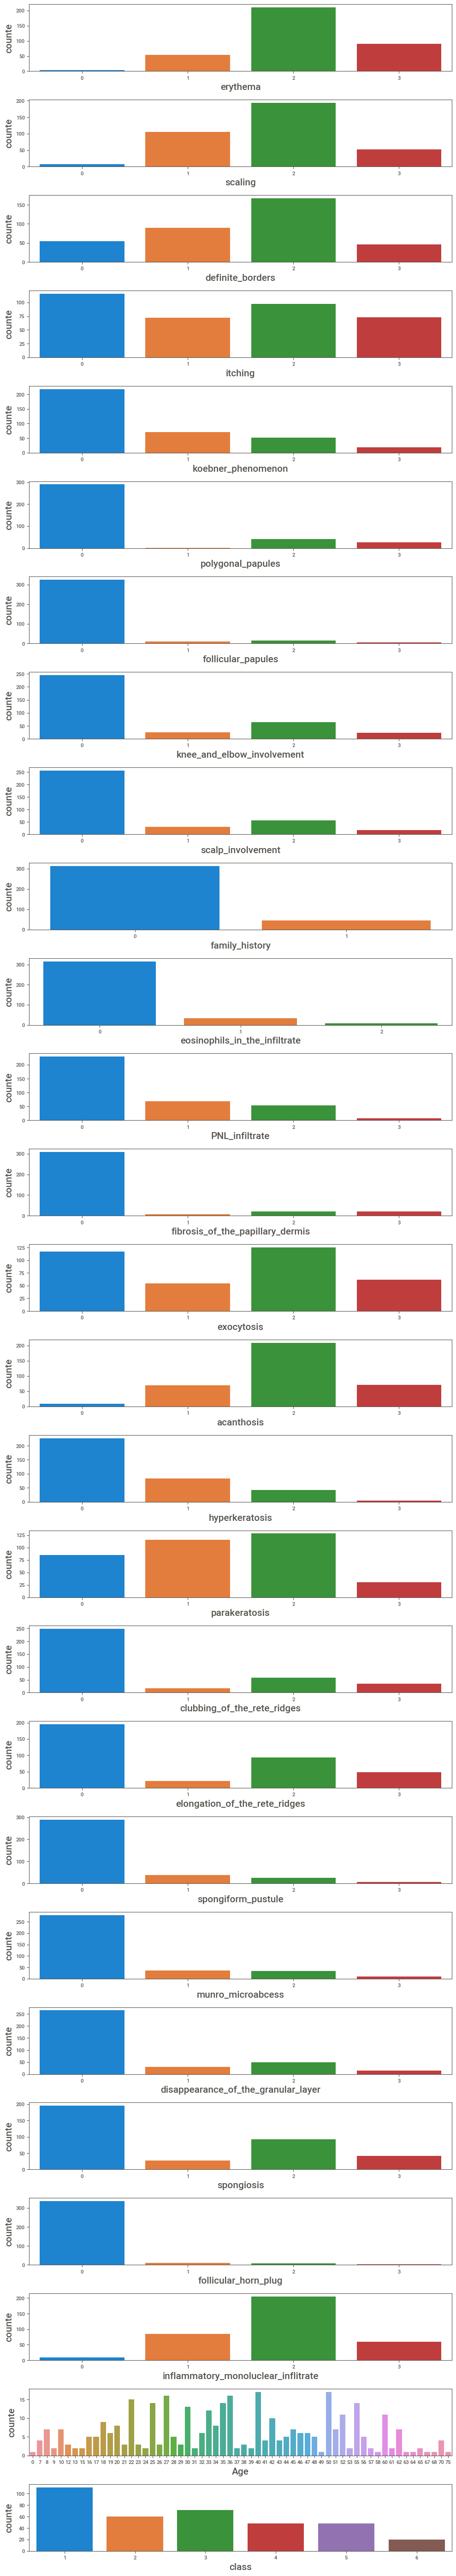

In [92]:
#ploting countplot
plt.figure(figsize=(10,70), facecolor='white')#To set canvas 
plotnumber = 1#counter

for column in df:#accessing the columns 
    if plotnumber<=34:
        ax = plt.subplot(34,1,plotnumber)
        sns.countplot(x=df[column])
        plt.xlabel(column,fontsize=15)#assign name to x-axis and set font-20
        plt.ylabel('counte',fontsize=15)
    plotnumber+=1#counter increment
plt.tight_layout()

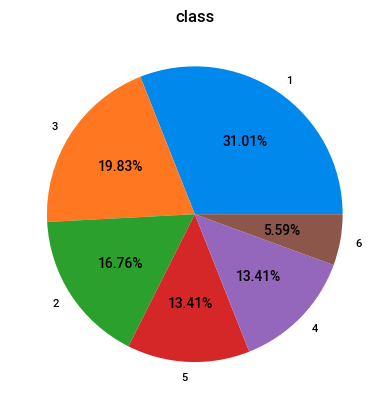

In [17]:
class_index=df['class'].value_counts().index
plt.title("class")
plt.pie(df['class'].value_counts(),labels=class_index\
       ,autopct='%1.2f%%')
plt.show()

In [18]:
df['class']

0      2
1      1
2      3
3      1
4      3
      ..
361    4
362    4
363    3
364    3
365    1
Name: class, Length: 358, dtype: int64

In [ ]:
## correlation of data 

In [19]:
corr=df.corr()

In [20]:
corr

erythema   scaling  \
erythema                                  1.000000  0.428769   
scaling                                   0.428769  1.000000   
definite_borders                          0.248062  0.347106   
itching                                  -0.033157 -0.072191   
koebner_phenomenon                       -0.008496 -0.009033   
polygonal_papules                         0.028225 -0.075013   
follicular_papules                       -0.115275 -0.098665   
oral_mucosal_involvement                 -0.033391 -0.084815   
knee_and_elbow_involvement                0.138519  0.294258   
scalp_involvement                         0.180740  0.295932   
family_history                            0.173740  0.187995   
melanin_incontinence                      0.036039 -0.080428   
eosinophils_in_the_infiltrate             0.071033  0.036771   
PNL_infiltrate                            0.220784  0.273509   
fibrosis_of_the_papillary_dermis         -0.334604 -0.371937   
exocytosis                                0.025297 -0.106149   
acanthosis                                0.085688  0.124884   
hyperkeratosis                           -0.040812  0.033167   
parakeratosis                             0.214551  0.306889   
clubbing_of_the_rete_ridges               0.164601  0.326104   
elongation_of_the_rete_ridges             0.023508  0.154432   
thinning_of_the_suprapapillary_epidermis  0.162065  0.323718   
spongiform_pustule                        0.172272  0.299116   
munro_microabcess                         0.108256  0.179588   
focal_hypergranulosis                    -0.020583 -0.090620   
disappearance_of_the_granular_layer       0.153229  0.205046   
vacuolisation_and_damage_of_basal_layer  -0.003972 -0.113133   
spongiosis                                0.038837  0.023095   
saw-tooth_appearance_of_retes            -0.012408 -0.118109   
follicular_horn_plug                     -0.008997 -0.014702   
perifollicular_parakeratosis              0.006100 -0.015402   
inflammatory_monoluclear_inflitrate       0.093026 -0.008453   
band-like_infiltrate                     -0.013850 -0.134966   
Age                                      -0.005028  0.016006   
class                                    -0.324846 -0.458499   

                                          definite_borders   itching  \
erythema                                          0.248062 -0.033157   
scaling                                           0.347106 -0.072191   
definite_borders                                  1.000000 -0.058534   
itching                                          -0.058534  1.000000   
koebner_phenomenon                                0.239778  0.280039   
polygonal_papules                                 0.322657  0.412525   
follicular_papules                               -0.176715 -0.144027   
oral_mucosal_involvement                          0.280341  0.361761   
knee_and_elbow_involvement                        0.301187 -0.296824   
scalp_involvement                                 0.261495 -0.152562   
family_history                                    0.112793 -0.139675   
melanin_incontinence                              0.305693  0.365353   
eosinophils_in_the_infiltrate                    -0.142520  0.100339   
PNL_infiltrate                                    0.035561 -0.137993   
fibrosis_of_the_papillary_dermis                 -0.252761  0.184312   
exocytosis                                       -0.210341  0.213461   
acanthosis                                        0.213508  0.058731   
hyperkeratosis                                    0.072985 -0.019349   
parakeratosis                                     0.368681 -0.079079   
clubbing_of_the_rete_ridges                       0.398286 -0.235030   
elongation_of_the_rete_ridges                     0.226386 -0.138078   
thinning_of_the_suprapapillary_epidermis          0.367492 -0.236290   
spongiform_pustule                                0.248590 -0.156881   
munro_mic

<AxesSubplot:>

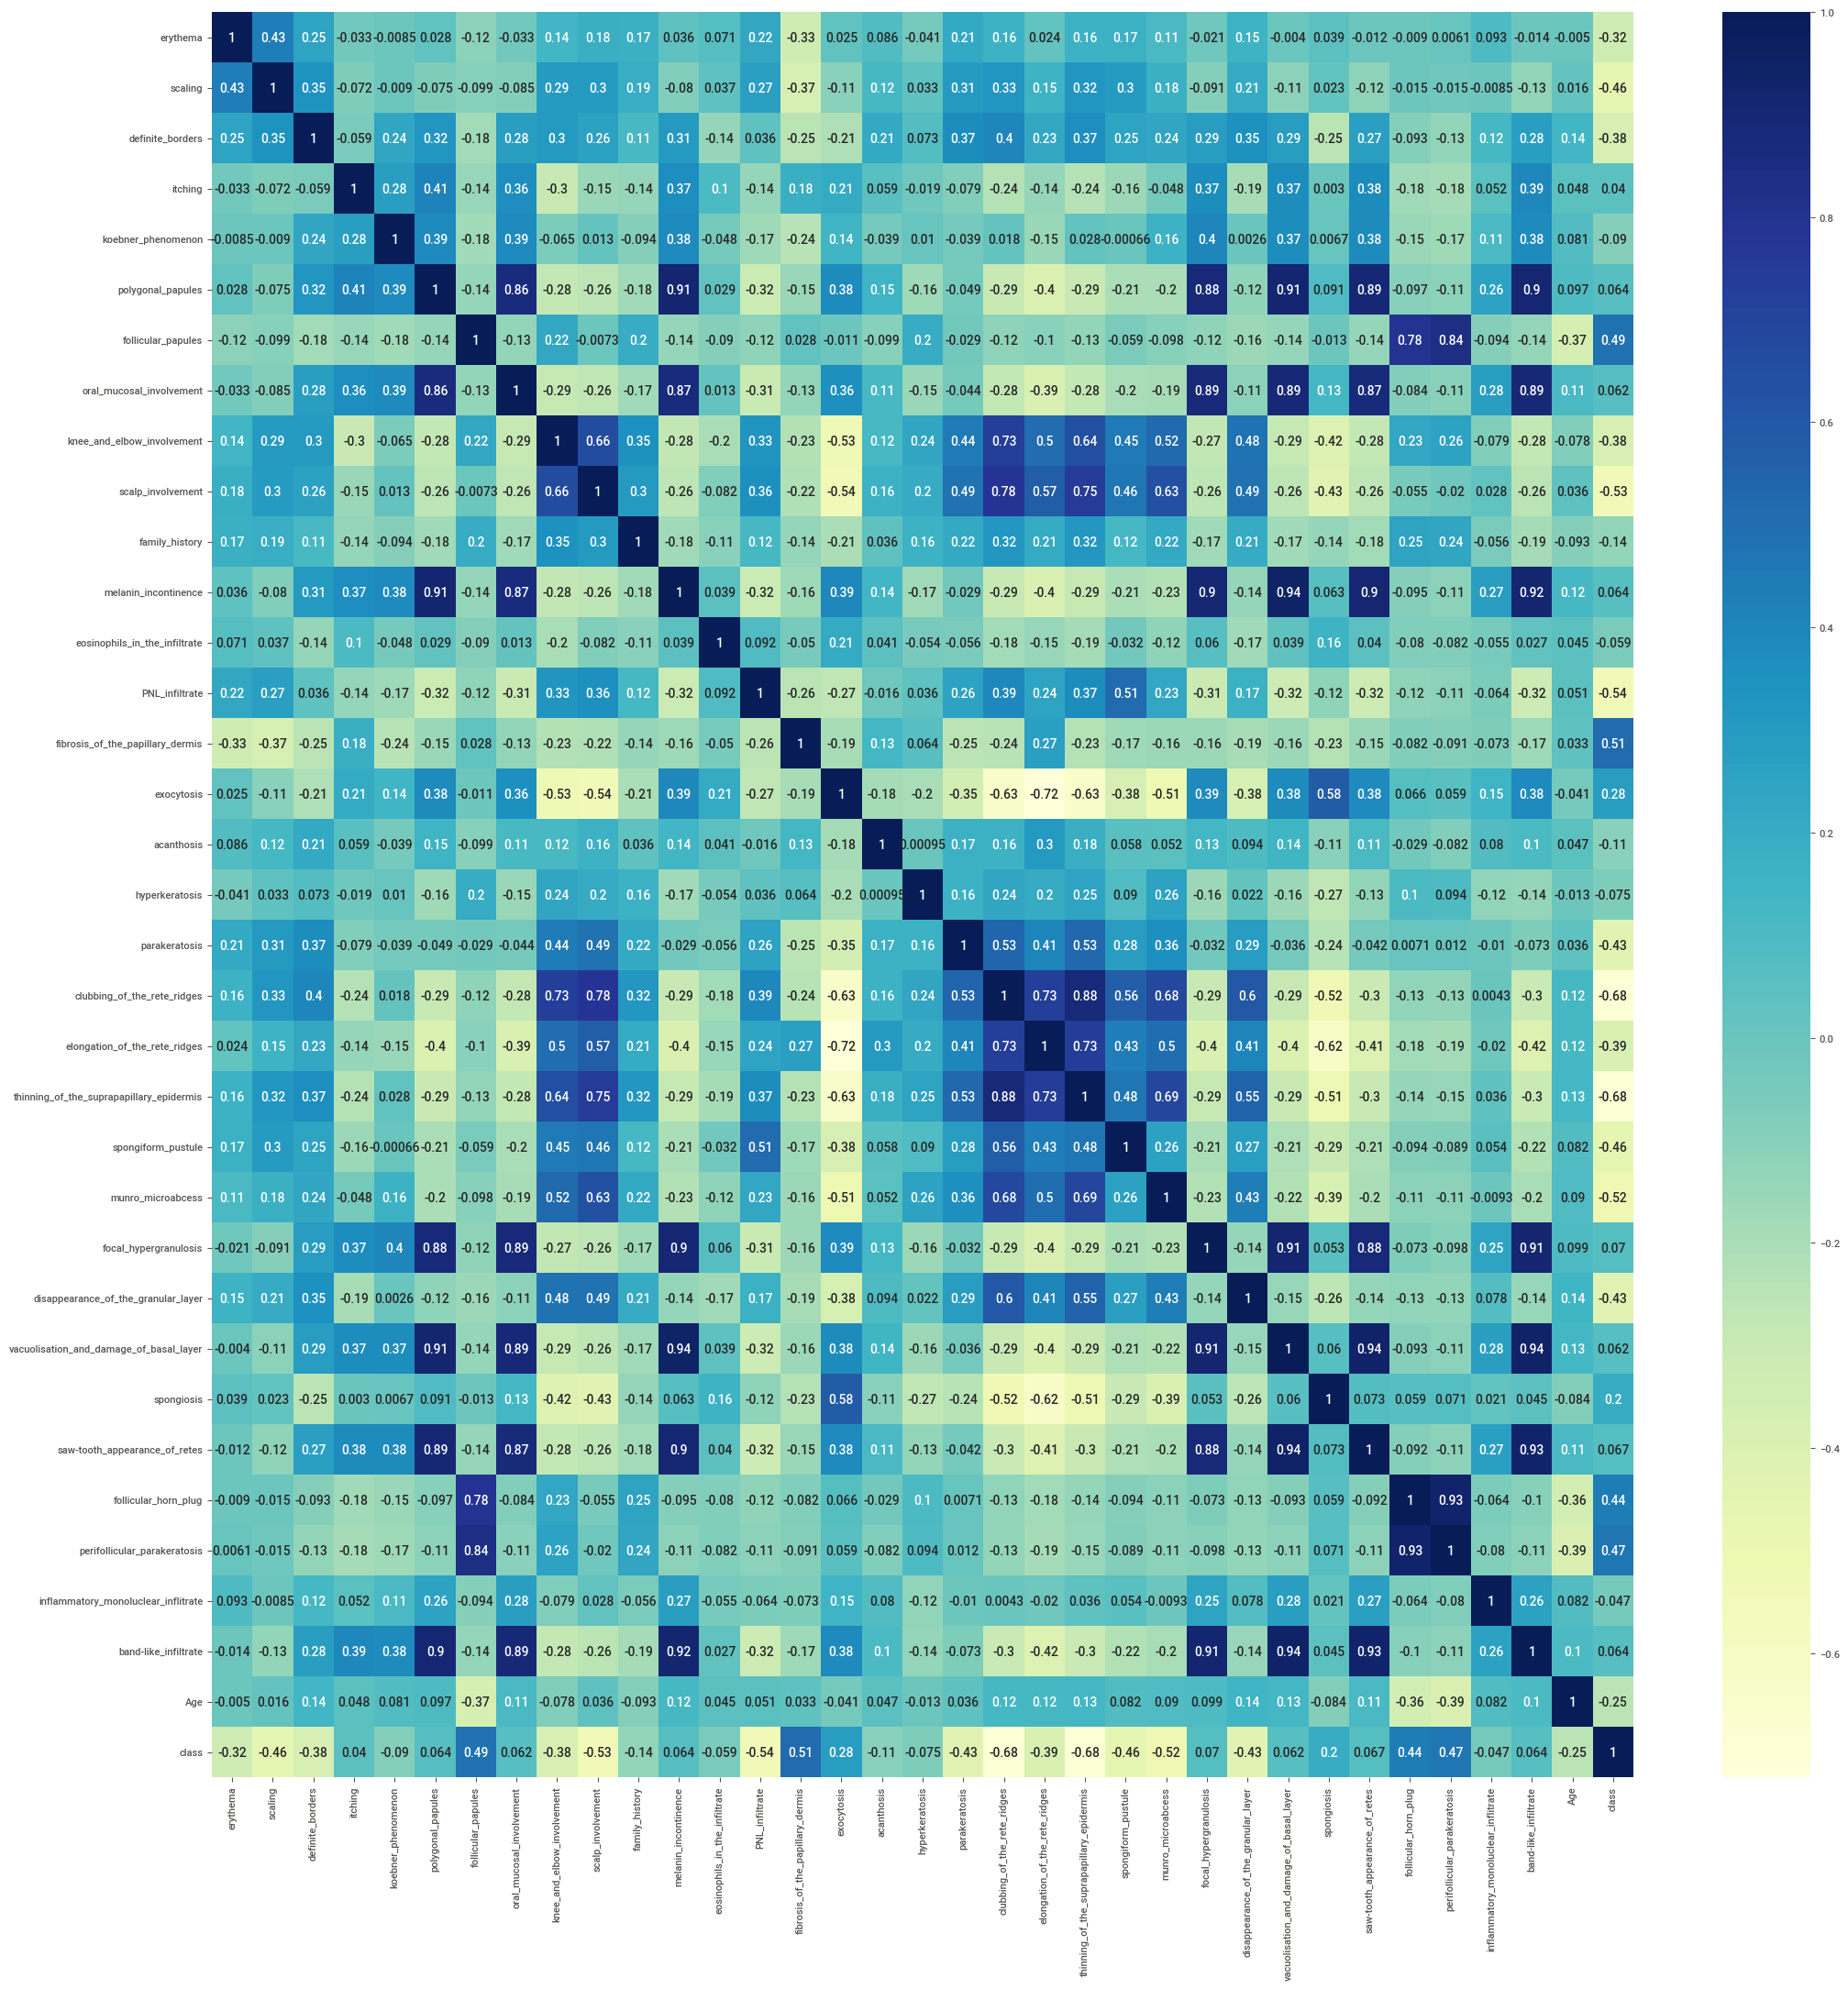

In [21]:
#Heat map
plt.figure(figsize=(25,25))
sns.heatmap(corr,cmap="YlGnBu",annot=True)

In [22]:
#creating function correlation which are grether then a threshold value
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [23]:
corr_feature=correlation(df,0.85)
corr_feature

{'band-like_infiltrate',
 'focal_hypergranulosis',
 'melanin_incontinence',
 'oral_mucosal_involvement',
 'perifollicular_parakeratosis',
 'saw-tooth_appearance_of_retes',
 'thinning_of_the_suprapapillary_epidermis',
 'vacuolisation_and_damage_of_basal_layer'}

In [24]:
#droping a high correlated coulnms
df.drop(corr_feature,axis=1,inplace=True)

In [94]:
corr1=df.corr()

<AxesSubplot:>

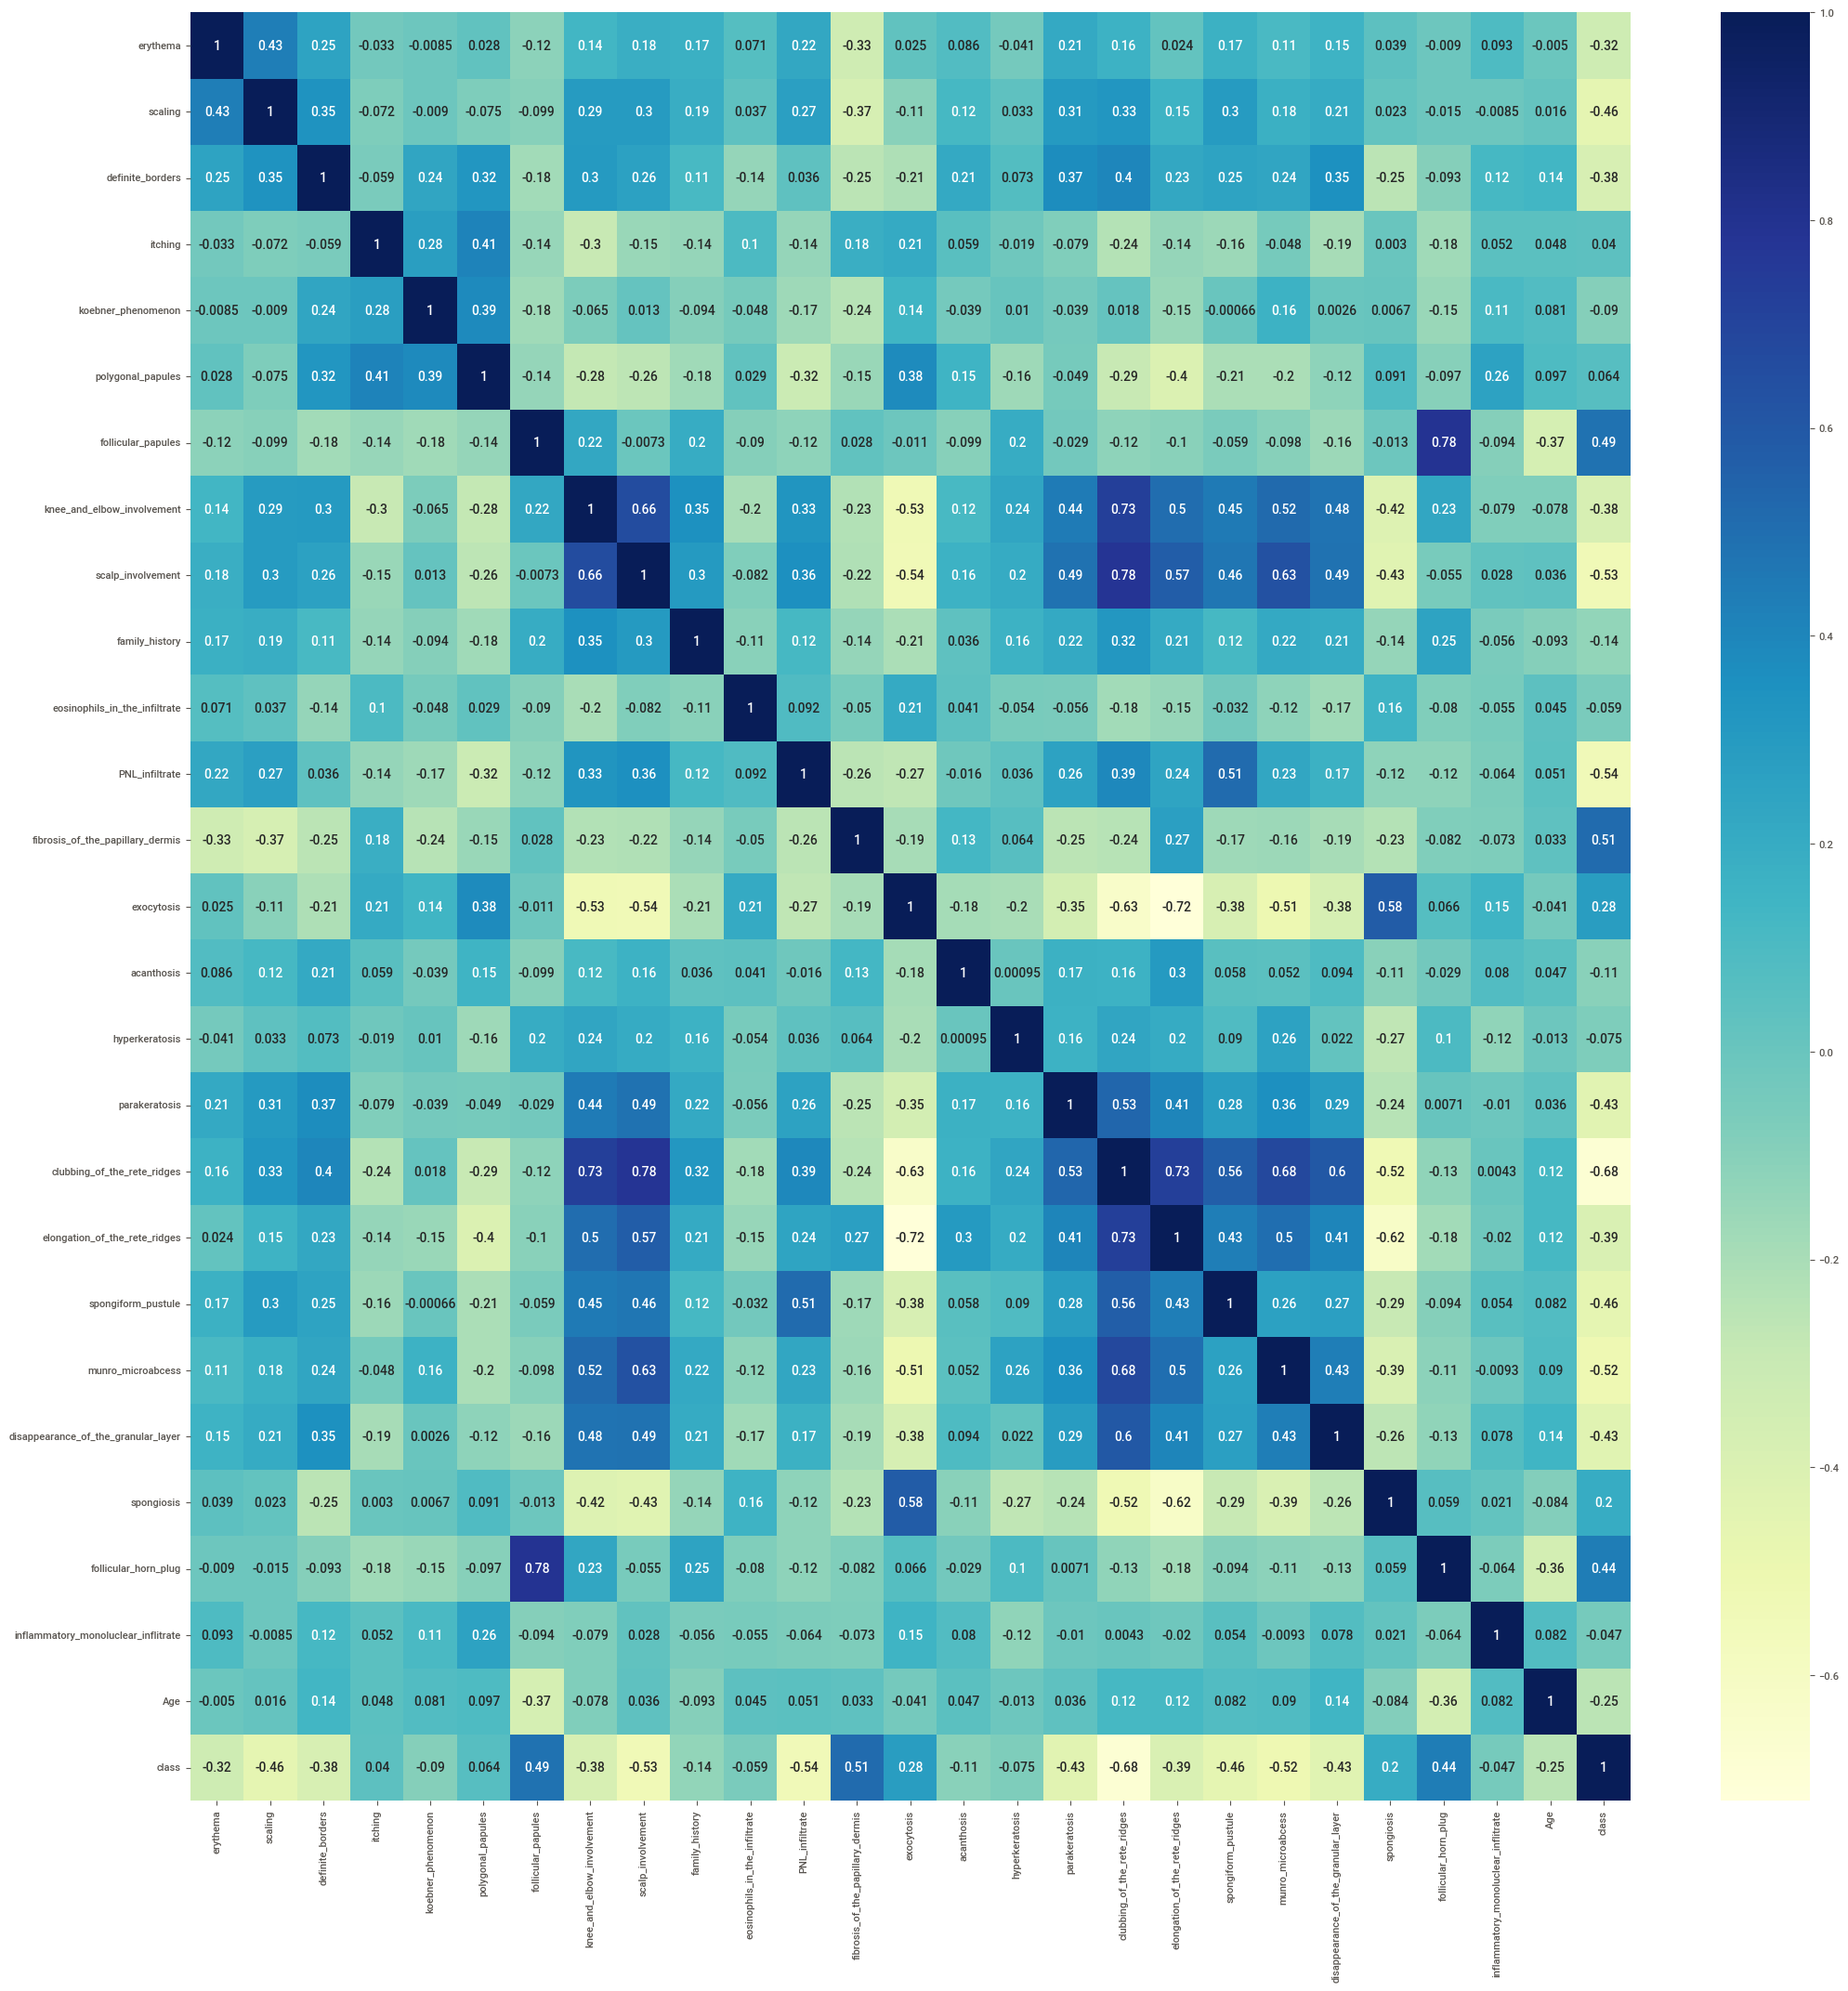

In [95]:
#Heat map
plt.figure(figsize=(25,25))
sns.heatmap(corr1,cmap="YlGnBu",annot=True)

### Dependent and Independent variable 

In [96]:
corr=df.corr()

In [97]:
X=df.drop(labels='class',axis=1)
y=df['class']

In [98]:
X

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0           2        2                 0        3                   0   
1           3        3                 3        2                   1   
2           2        1                 2        3                   1   
3           2        2                 2        0                   0   
4           2        3                 2        2                   2   
..        ...      ...               ...      ...                 ...   
361         2        1                 1        0                   1   
362         3        2                 1        0                   1   
363         3        2                 2        2                   3   
364         2        1                 3        1                   2   
365         3        2                 2        0                   0   

     polygonal_papules  follicular_papules  knee_and_elbow_involvement  \
0                    0                   0                           1   
1                    0                   0                           1   
2                    3                   0                           0   
3                    0                   0                           3   
4                    2                   0                           0   
..                 ...                 ...                         ...   
361                  0                   0                           0   
362                  0                   0                           0   
363                  2                   0                           0   
364                  3                   0                           0   
365                  0                   0                           3   

     scalp_involvement  family_history  ...  parakeratosis  \
0                    0               0  ...              0   
1                    1               1  ...              2   
2                    0               0  ...              2   
3                    2               0  ...              3   
4                    0               0  ...              0   
..                 ...             ...  ...            ...   
361                  0               0  ...              0   
362                  0               0  ...              0   
363                  0               0  ...              0   
364                  0               0  ...              0   
365                  3               0  ...              2   

     clubbing_of_the_rete_ridges  elongation_of_the_rete_ridges  \
0                              0                              0   
1                              2                              2   
2                              0                              0   
3                              2                              2   
4                              0                              0   
..                           ...                            ...   
361                            0                              0   
362                            0                              0   
363                            0                              0   
364                            0                              0   
365                            3                              2   

     spongiform_pustule  munro_microabcess  \
0                     0                  0   
1                     2                  1   
2                     0                  0   
3                     2                  0   
4                     0                  0   
..                  ...                ...   
361                   0                  0   
362                   0                  0   
363                   0                  0   
364                   0                  0   
365                   0                  2   

     disappearance_of_the_granular_layer  spongiosis  follicular_horn_plug  \
0                                      0           3      

In [99]:
y

0      2
1      1
2      3
3      1
4      3
      ..
361    4
362    4
363    3
364    3
365    1
Name: class, Length: 358, dtype: int64

### Imbalanced data

In [100]:
!pip install imblearn 

In [101]:
print(X.shape,y.shape)

(358, 26) (358,)


In [102]:
from imblearn.over_sampling import SMOTE 
from collections import Counter

In [103]:
oversample=SMOTE()
X,y=oversample.fit_resample(X,y)

In [104]:
counter =Counter(y)
for k, v in counter.items():
    dist=v/len(y)*100
    print(f'class{k},n={v} ({dist}%)')

class2,n=111 (16.666666666666664%)
class1,n=111 (16.666666666666664%)
class3,n=111 (16.666666666666664%)
class5,n=111 (16.666666666666664%)
class4,n=111 (16.666666666666664%)
class6,n=111 (16.666666666666664%)


In [105]:
print(X.shape,y.shape)

(666, 26) (666,)


In [106]:
sorted(y.unique())

[1, 2, 3, 4, 5, 6]

In [107]:
y.replace([1,2,3,4,5,6],[0,1,2,3,4,5],inplace=True)

In [108]:
sorted(y.unique())

[0, 1, 2, 3, 4, 5]

### scaling 

In [109]:
!pip install sklearn

In [110]:
from sklearn.preprocessing import StandardScaler

In [111]:
scaler=StandardScaler( )
X=scaler.fit_transform(X)


### Train Test Split

In [112]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [113]:
X_train

array([[ 0.16134001, -0.90184777, -0.25191713, ..., -0.38560303,
        -0.92051753, -0.73445304],
       [ 0.16134001, -0.90184777, -1.3484976 , ...,  1.30394709,
        -0.92051753, -1.33529536],
       [-1.37369495, -0.90184777, -0.25191713, ..., -0.38560303,
        -0.92051753, -0.19369496],
       ...,
       [ 0.16134001,  0.55246364, -1.3484976 , ..., -0.38560303,
         0.47917351, -0.49411612],
       [ 0.16134001, -0.90184777, -1.3484976 , ..., -0.38560303,
         0.47917351,  1.0680739 ],
       [ 1.69637498,  0.55246364,  1.9412438 , ..., -0.38560303,
        -0.92051753,  1.36849505]])

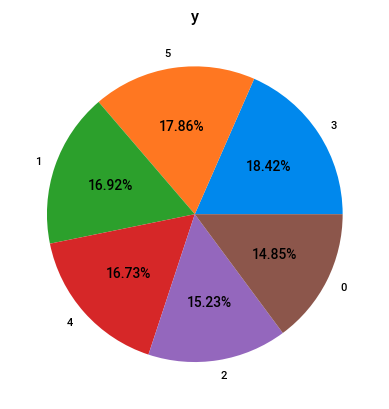

In [114]:
y_index=y_train.value_counts().index
plt.title("y")
plt.pie(y_train.value_counts(),labels=y_index\
       ,autopct='%1.2f%%',)
plt.show()

### LOGISTIC REGRESSION

In [115]:
from sklearn.linear_model import LogisticRegression 

In [116]:
 LR=LogisticRegression(random_state=2,multi_class='ovr')

In [117]:
LR.fit(X_train,y_train)
y_train_predict_1=LR.predict(X_train)
y_test_predict_1=LR.predict(X_test)
y_test_pred_prob_1=LR.predict_proba(X_test)

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print('train accuracy:',accuracy_score(y_train,y_train_predict_1))
print('test accuracy:',accuracy_score(y_test,y_test_predict_1))
print(classification_report(y_test,y_test_predict_1))


train accuracy: 0.9887218045112782
test accuracy: 0.9626865671641791
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.90      0.90      0.90        21
           2       1.00      0.97      0.98        30
           3       0.79      0.85      0.81        13
           4       1.00      1.00      1.00        22
           5       1.00      1.00      1.00        16

    accuracy                           0.96       134
   macro avg       0.95      0.95      0.95       134
weighted avg       0.96      0.96      0.96       134



In [118]:
y_test[0:]

55     1
370    1
389    1
84     0
597    5
      ..
311    0
130    4
120    0
638    5
307    2
Name: class, Length: 134, dtype: int64

In [119]:
y_test_predict_1[0:]

array([1, 3, 3, 0, 5, 0, 2, 0, 0, 3, 2, 2, 5, 0, 2, 4, 0, 1, 0, 4, 5, 1,
       4, 5, 0, 0, 5, 2, 4, 3, 1, 4, 4, 2, 1, 4, 1, 5, 3, 0, 2, 0, 3, 1,
       2, 4, 5, 0, 2, 1, 3, 0, 2, 2, 0, 5, 0, 3, 0, 5, 2, 0, 0, 5, 2, 1,
       4, 4, 2, 1, 0, 2, 4, 3, 0, 2, 4, 2, 4, 2, 0, 1, 0, 1, 2, 4, 2, 0,
       1, 2, 3, 3, 4, 5, 2, 4, 1, 2, 2, 4, 0, 2, 0, 0, 0, 1, 5, 0, 2, 4,
       5, 3, 4, 1, 0, 2, 1, 1, 1, 2, 3, 3, 4, 0, 1, 4, 5, 1, 5, 0, 4, 0,
       5, 2], dtype=int64)

In [120]:
pd.crosstab(y_test,y_test_predict_1) 

col_0   0   1   2   3   4   5
class                        
0      32   0   0   0   0   0
1       0  19   0   2   0   0
2       0   0  29   1   0   0
3       0   2   0  11   0   0
4       0   0   0   0  22   0
5       0   0   0   0   0  16

In [121]:
roc_score=roc_auc_score(y_test,y_test_pred_prob_1,multi_class='ovr')
roc_score

0.997638099810264

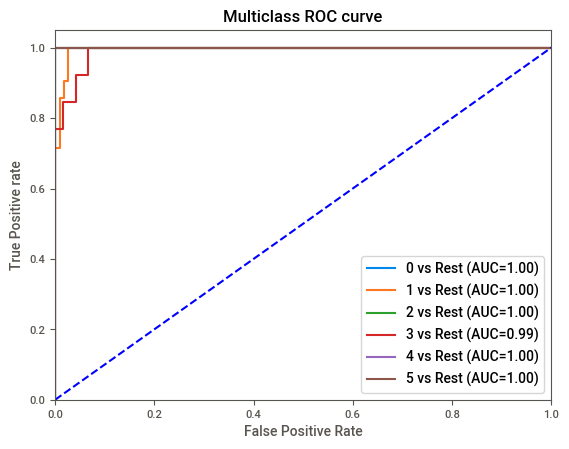

In [122]:
from sklearn.preprocessing import label_binarize
#binarize the y_values

y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()
classes=np.unique(y_test)
n_class = classes.shape[0]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i],y_test_pred_prob_1[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='-', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

# XGBOOST

In [123]:
!pip install xgboost

In [124]:
import xgboost as xgb
xgb_model=xgb.XGBClassifier(random_state=2,objective='multi:sofprob')

In [125]:
xgb_model.fit(X_train,y_train)
y_train_predict_2=xgb_model.predict(X_train)
y_test_predict_2=xgb_model.predict(X_test)
y_test_pred_prob_2=xgb_model.predict_proba(X_test)

from sklearn.metrics import accuracy_score,classification_report
print('train accuracy:',accuracy_score(y_train,y_train_predict_2))
print('test accuracy:',accuracy_score(y_test,y_test_predict_2))
print(classification_report(y_test,y_test_predict_2))


train accuracy: 1.0
test accuracy: 0.9701492537313433
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.87      0.95      0.91        21
           2       1.00      1.00      1.00        30
           3       0.91      0.77      0.83        13
           4       1.00      1.00      1.00        22
           5       1.00      1.00      1.00        16

    accuracy                           0.97       134
   macro avg       0.96      0.95      0.96       134
weighted avg       0.97      0.97      0.97       134



In [126]:
y_test_predict_2

array([1, 3, 1, 0, 5, 0, 2, 0, 0, 3, 2, 2, 5, 0, 2, 4, 0, 1, 0, 4, 5, 1,
       4, 5, 0, 0, 5, 2, 4, 3, 1, 4, 4, 2, 1, 4, 1, 5, 3, 0, 2, 0, 3, 1,
       2, 4, 5, 0, 2, 1, 3, 0, 2, 2, 0, 5, 0, 2, 0, 5, 2, 0, 0, 5, 2, 1,
       4, 4, 2, 1, 0, 2, 4, 1, 0, 2, 4, 2, 4, 2, 0, 1, 0, 1, 2, 4, 2, 0,
       1, 2, 3, 3, 4, 5, 2, 4, 1, 2, 2, 4, 0, 2, 0, 0, 0, 1, 5, 0, 2, 4,
       5, 3, 4, 1, 0, 2, 1, 1, 1, 2, 3, 3, 4, 0, 1, 4, 5, 1, 5, 0, 4, 0,
       5, 2], dtype=int64)

In [127]:
from sklearn.metrics import classification_report, confusion_matrix

In [128]:
print(confusion_matrix(y_test,y_test_predict_2))

[[32  0  0  0  0  0]
 [ 0 20  0  1  0  0]
 [ 0  0 30  0  0  0]
 [ 0  3  0 10  0  0]
 [ 0  0  0  0 22  0]
 [ 0  0  0  0  0 16]]


In [129]:
pd.crosstab(y_test,y_test_predict_2) 

col_0   0   1   2   3   4   5
class                        
0      32   0   0   0   0   0
1       0  20   0   1   0   0
2       0   0  30   0   0   0
3       0   3   0  10   0   0
4       0   0   0   0  22   0
5       0   0   0   0   0  16

In [130]:
roc_score=roc_auc_score(y_test,y_test_pred_prob_2,multi_class='ovr')
roc_score

0.9981678730673099

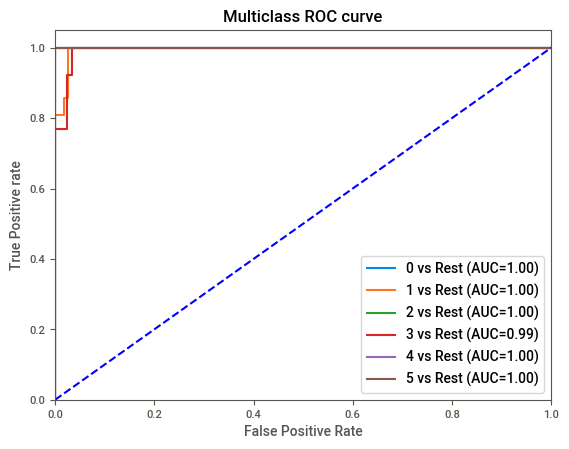

In [131]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()
classes=np.unique(y_test)
n_class = classes.shape[0]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i],y_test_pred_prob_2[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='-', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

 ### KNN

In [132]:
from sklearn.neighbors import KNeighborsClassifier

In [133]:
error_rate=[]

for i in range(1,15):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'error_rate')

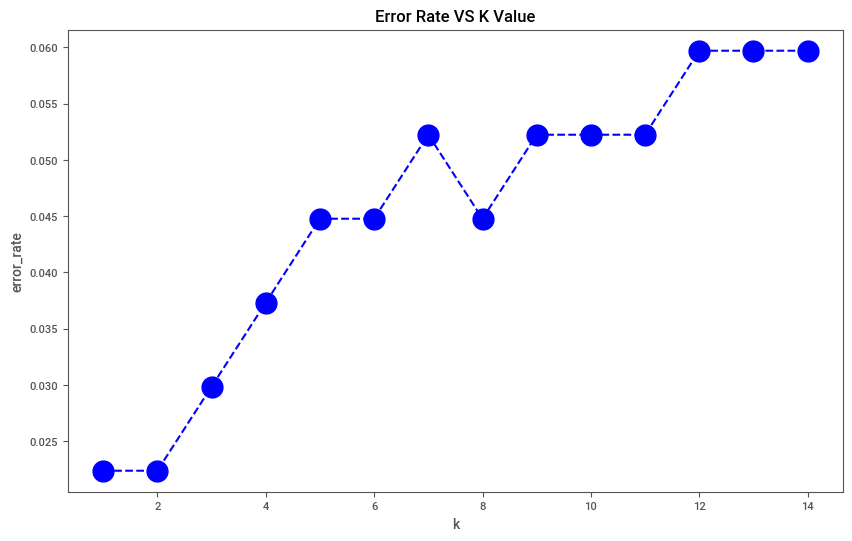

In [134]:
plt.figure(figsize=(10,6))
plt.plot( range(1,15),error_rate,color='blue',linestyle='dashed',marker='o',
              markersize=15)
plt.title('Error Rate VS K Value')
plt.xlabel("k")
plt.ylabel('error_rate')

In [135]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)

In [136]:
knn.fit(X_train,y_train)
y_train_predict_3=knn.predict(X_train)
y_test_predict_3=knn.predict(X_test)
y_test_pred_prob_3=knn.predict_proba(X_test)

from sklearn.metrics import accuracy_score,classification_report
print('train accuracy:',accuracy_score(y_train,y_train_predict_3))
print('test accuracy:',accuracy_score(y_test,y_test_predict_3))
print(classification_report(y_test,y_test_predict_3))


train accuracy: 1.0
test accuracy: 0.9776119402985075
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.91      1.00      0.95        21
           2       1.00      0.97      0.98        30
           3       0.92      0.85      0.88        13
           4       1.00      1.00      1.00        22
           5       1.00      1.00      1.00        16

    accuracy                           0.98       134
   macro avg       0.97      0.97      0.97       134
weighted avg       0.98      0.98      0.98       134



In [137]:
pd.crosstab(y_test,y_test_predict_3) 

col_0   0   1   2   3   4   5
class                        
0      32   0   0   0   0   0
1       0  21   0   0   0   0
2       0   0  29   1   0   0
3       0   2   0  11   0   0
4       0   0   0   0  22   0
5       0   0   0   0   0  16

In [138]:
roc_score=roc_auc_score(y_test,y_test_pred_prob_3,multi_class='ovr')
roc_score

0.9822380779138623

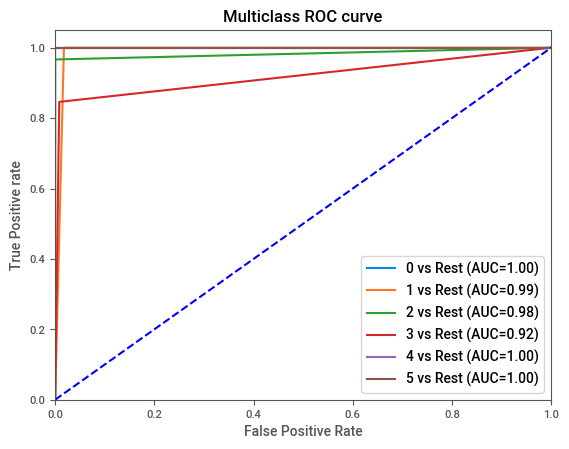

In [139]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()
classes=np.unique(y_test)
n_class = classes.shape[0]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i],y_test_pred_prob_3[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='-', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

### SVM

In [140]:
from sklearn.svm import LinearSVC,SVC

In [141]:
svc=SVC(probability=True )

In [142]:
svc.fit(X_train,y_train)
y_train_predict_4=svc.predict(X_train)
y_test_predict_4=svc.predict(X_test)
y_test_pred_prob_4=svc.predict_proba(X_test)

from sklearn.metrics import accuracy_score,classification_report
print('train accuracy:',accuracy_score(y_train,y_train_predict_4))
print('test accuracy:',accuracy_score(y_test,y_test_predict_4))
print(classification_report(y_test,y_test_predict_4))


train accuracy: 0.9924812030075187
test accuracy: 0.9626865671641791
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.95      0.90      0.93        21
           2       1.00      0.93      0.97        30
           3       0.75      0.92      0.83        13
           4       1.00      1.00      1.00        22
           5       1.00      1.00      1.00        16

    accuracy                           0.96       134
   macro avg       0.95      0.96      0.95       134
weighted avg       0.97      0.96      0.96       134



In [143]:
pd.crosstab(y_test,y_test_predict_4) 

col_0   0   1   2   3   4   5
class                        
0      32   0   0   0   0   0
1       0  19   0   2   0   0
2       0   0  28   2   0   0
3       0   1   0  12   0   0
4       0   0   0   0  22   0
5       0   0   0   0   0  16

In [144]:
roc_score=roc_auc_score(y_test,y_test_pred_prob_4,multi_class='ovr')
roc_score

0.9977785689772819

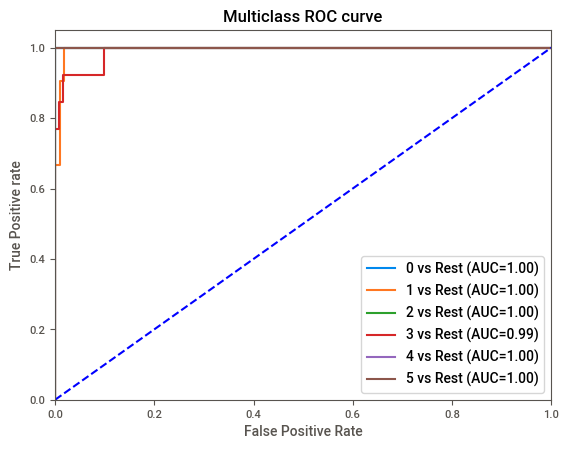

In [145]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()
classes=np.unique(y_test)
n_class = classes.shape[0]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i],y_test_pred_prob_4[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='-', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

### random forest

In [146]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()

In [147]:
RF.fit(X_train,y_train)
y_train_predict_5=RF.predict(X_train)
y_test_predict_5=RF.predict(X_test)
y_test_pred_prob_5=RF.predict_proba(X_test)

from sklearn.metrics import accuracy_score,classification_report
print('train accuracy:',accuracy_score(y_train,y_train_predict_5))
print('test accuracy:',accuracy_score(y_test,y_test_predict_5))
print(classification_report(y_test,y_test_predict_5))


train accuracy: 1.0
test accuracy: 0.9701492537313433
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.91      0.95      0.93        21
           2       1.00      0.97      0.98        30
           3       0.85      0.85      0.85        13
           4       1.00      1.00      1.00        22
           5       1.00      1.00      1.00        16

    accuracy                           0.97       134
   macro avg       0.96      0.96      0.96       134
weighted avg       0.97      0.97      0.97       134



In [148]:
yp5=RF.predict(X_test)

In [149]:
y_test[0:10]

55     1
370    1
389    1
84     0
597    5
265    0
107    2
244    0
275    0
295    3
Name: class, dtype: int64

In [150]:
y_test_predict_5

array([1, 3, 1, 0, 5, 0, 2, 0, 0, 3, 2, 2, 5, 0, 2, 4, 0, 1, 0, 4, 5, 1,
       4, 5, 0, 0, 5, 2, 4, 3, 1, 4, 4, 2, 1, 4, 1, 5, 3, 0, 2, 0, 3, 1,
       2, 4, 5, 0, 2, 1, 3, 0, 2, 2, 0, 5, 0, 3, 0, 5, 2, 0, 0, 5, 2, 1,
       4, 4, 2, 1, 0, 2, 4, 1, 0, 2, 4, 2, 4, 2, 0, 1, 0, 1, 2, 4, 2, 0,
       3, 2, 3, 3, 4, 5, 2, 4, 1, 2, 2, 4, 0, 2, 0, 0, 0, 1, 5, 0, 2, 4,
       5, 3, 4, 1, 0, 2, 1, 1, 1, 2, 3, 3, 4, 0, 1, 4, 5, 1, 5, 0, 4, 0,
       5, 2], dtype=int64)

In [151]:
pd.crosstab(y_test,y_test_predict_5) 

col_0   0   1   2   3   4   5
class                        
0      32   0   0   0   0   0
1       0  20   0   1   0   0
2       0   0  29   1   0   0
3       0   2   0  11   0   0
4       0   0   0   0  22   0
5       0   0   0   0   0  16

In [152]:
roc_score=roc_auc_score(y_test,y_test_pred_prob_5,multi_class='ovr')
roc_score

0.9984851342453916

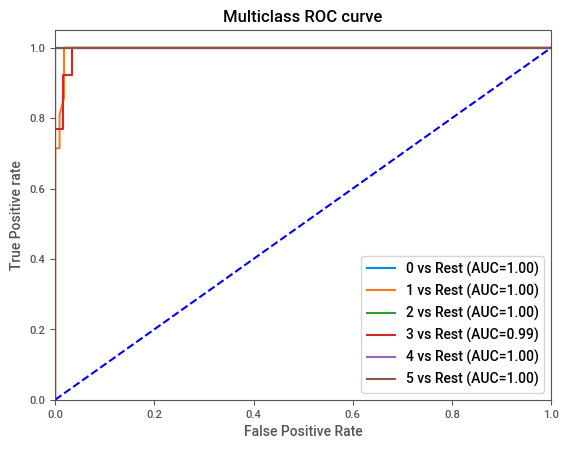

In [153]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()
classes=np.unique(y_test)
n_class = classes.shape[0]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i],y_test_pred_prob_5[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='-', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

## Decision Tree

In [154]:
from sklearn.tree import DecisionTreeClassifier

In [155]:
DT=DecisionTreeClassifier(max_depth=32)
DT.fit(X_train,y_train)

y_train_predict_6=DT.predict(X_train)
y_test_predict_6=DT.predict(X_test)
y_test_pred_prob_6=DT.predict_proba(X_test)

from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import cross_val_score
print('train accuracy:',accuracy_score(y_train,y_train_predict_6))
print('test accuracy:',accuracy_score(y_test,y_test_predict_6))
print(classification_report(y_test,y_test_predict_6))


train accuracy: 1.0
test accuracy: 0.9552238805970149
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       0.90      0.90      0.90        21
           2       1.00      0.97      0.98        30
           3       0.79      0.85      0.81        13
           4       1.00      1.00      1.00        22
           5       0.94      1.00      0.97        16

    accuracy                           0.96       134
   macro avg       0.94      0.95      0.94       134
weighted avg       0.96      0.96      0.96       134



In [156]:
pd.crosstab(y_test,y_test_predict_6) 

col_0   0   1   2   3   4   5
class                        
0      31   0   0   0   0   1
1       0  19   0   2   0   0
2       0   0  29   1   0   0
3       0   2   0  11   0   0
4       0   0   0   0  22   0
5       0   0   0   0   0  16

In [157]:
roc_score=roc_auc_score(y_test,y_test_pred_prob_6,multi_class='ovr')
roc_score

0.9696137781531027

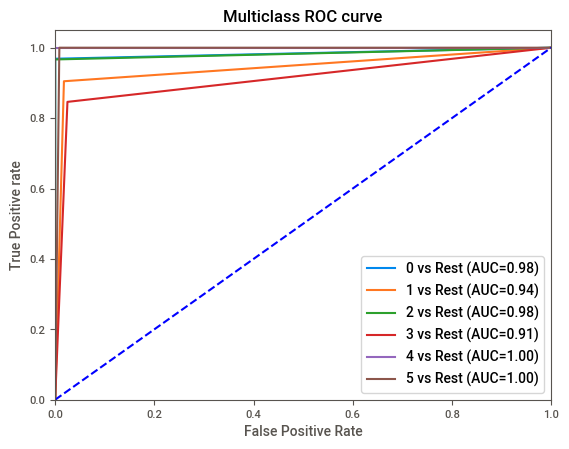

In [158]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()
classes=np.unique(y_test)
n_class = classes.shape[0]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i],y_test_pred_prob_6[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='-', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()